**Q1.** How can you create a Bokeh plot using Python code?

**Ans:**

In [ ]:
!pip install bokeh

In [1]:
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
from bokeh.plotting import figure , output_file, show
from bokeh.sampledata.iris import flowers

In [7]:
output_file('test.html')

p = figure(title = 'test flower')
p.xaxis.axis_label = "petal_length"
p.yaxis.axis_label = "petal_width"
p.circle(flowers['petal_length'] , flowers['petal_width'])
show(p)

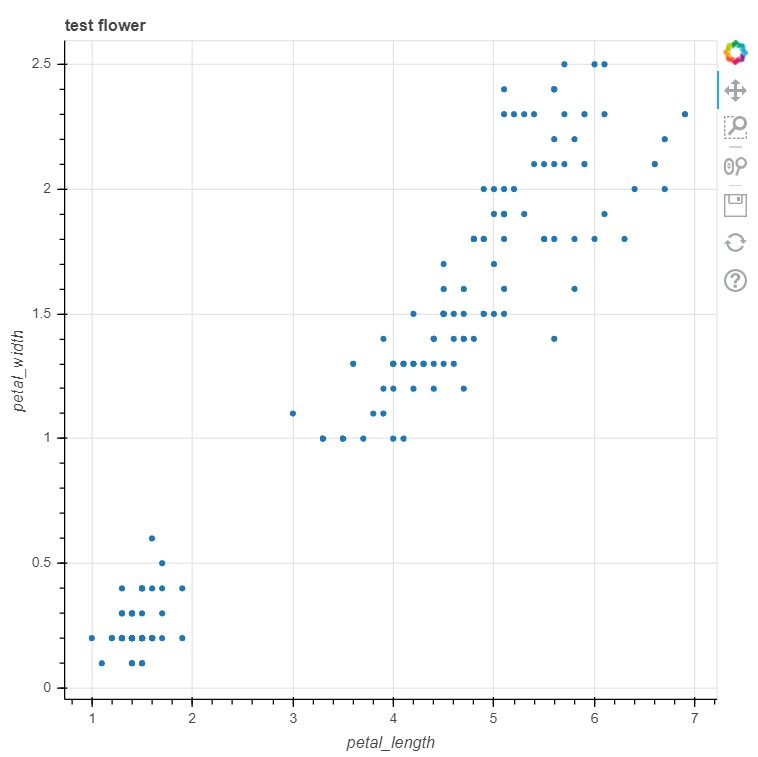

**Q2.** What are glyphs in Bokeh, and how can you add them to a Bokeh plot? Explain with an example.

**Ans:**

A glyph is a visual shape or marker that can be used to represent data points in a plot. Some common glyphs include circles, squares, triangles, and lines. Glyphs can be customized in various ways, such as changing their size, color, and transparency.

To add glyphs to a Bokeh plot, you can use the glyph method of a Figure object. This method takes several arguments, including the x-axis and y-axis data to be plotted, as well as any additional parameters that control the appearance of the glyph, such as its size and color.

In [8]:
import numpy as np
from bokeh.plotting import figure, show

x = np.random.normal(size=100)
y = np.random.normal(size=100)
p = figure(title='Scatter Plot', x_axis_label='X', y_axis_label='Y')
p.circle(x, y, size=10, color='blue', alpha=0.5)
show(p)

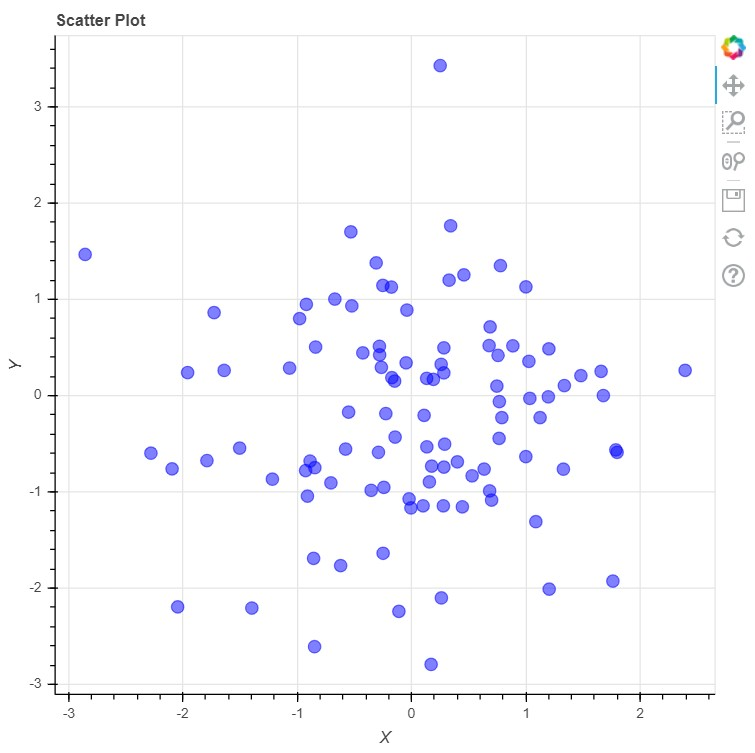

**Q3.** How can you customize the appearance of a Bokeh plot, including the axes, title, and legend?

**Ans:**

Bokeh provides a wide range of customization options that you can use to adjust the appearance of a plot. Here are some common ways to customize a Bokeh plot:

1. Set the title: You can set the title of a plot using the title attribute of a Figure object.
2. Set the axis labels: You can set the labels for the x-axis and y-axis using the x_axis_label and y_axis_label attributes of a Figure object, respectively.
3. Customize the axis tick labels: You can customize the appearance of the tick labels on the x-axis and y-axis using the xaxis and yaxis attributes of a Figure object. For example, to change the font size of the tick labels on the x-axis.
4. Add a legend: You can add a legend to a plot using the legend attribute of a glyph method, such as circle or line. You can set the legend label using the legend_label parameter.
5. Customize the plot background: You can customize the background color of a plot using the background_fill_color attribute of a Figure object.
6. Customize the plot border: You can customize the border of a plot using the border_fill_color attribute of a Figure object.
7. Adjust the plot size: You can adjust the size of a plot using the plot_width and plot_height attributes of a Figure object.

In [9]:
output_file('test.html')

p = figure(title = 'test flower')
p.xaxis.axis_label = "petal_length"
p.yaxis.axis_label = "petal_width"
p.circle(flowers['petal_length'] , flowers['petal_width'],size = 10,fill_color = 'red',legend_label = 'Flower Dataset')
show(p)

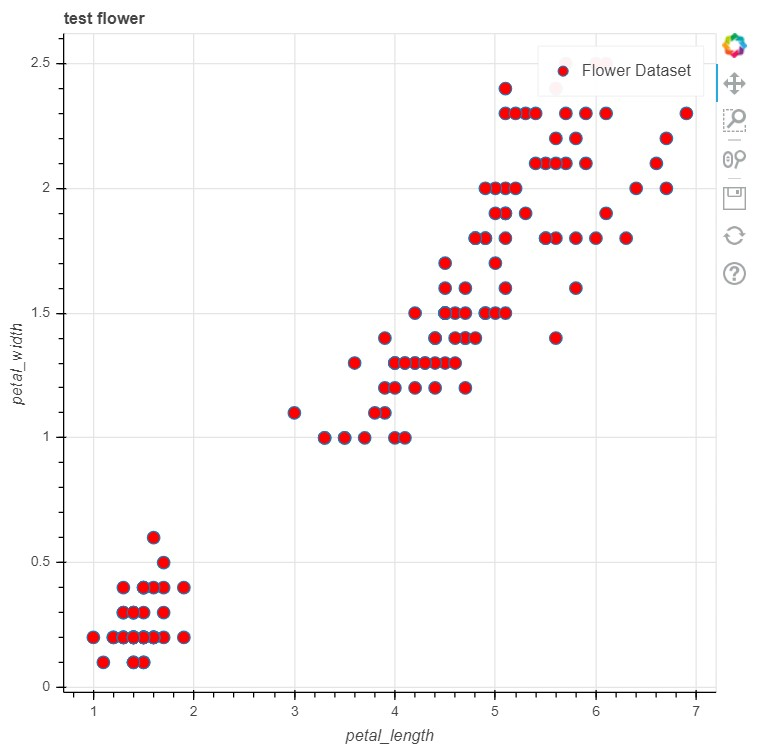

**Q4.** What is a Bokeh server, and how can you use it to create interactive plots that can be updated in
real time?

**Ans:**

A Bokeh server is a Python process that allows you to create and serve Bokeh plots as interactive web applications. The server provides a framework for creating dynamic, data-driven applications that can update in real time as the user interacts with them. Bokeh applications can be deployed on a local machine or on a web server, and can be accessed using a web browser.

To create an interactive plot using the Bokeh server, you can use the bokeh.server.server module to define a Bokeh application. We define a function modify_doc that takes a doc argument, which represents the Bokeh document that will be served to the web browser. Inside modify_doc, we create a ColumnDataSource object, which will hold the data for the plot, and a figure object to display the data. We also define a callback function update that will update the data every second.

Next, we use FunctionHandler to wrap modify_doc and create a Bokeh application. We then create a Server object and pass in the application, which will handle incoming requests from the web browser. Finally, we start the server and navigate to http://localhost:5006/ in a web browser to view the plot.

When the plot is loaded in the web browser, the update function will run every second, updating the data in the plot and causing it to be redrawn with the new data. By defining additional callbacks and event handlers, you can create more complex interactive plots that respond to user input and update in real time.

In [ ]:
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure
from bokeh.server.server import Server
from bokeh.application import Application
from bokeh.application.handlers.function import FunctionHandler

def modify_doc(doc):
    
    source = ColumnDataSource(data=dict(x=[], y=[]))

    def update():
        new_data = dict(x=[1, 2, 3], y=[4, 5, 6])
        source.stream(new_data)

    p = figure()
    p.circle(x='x', y='y', source=source)

    doc.add_periodic_callback(update, 1000)
    doc.add_root(p)

handler = FunctionHandler(modify_doc)
app = Application(handler)
server = Server({'/': app})
server.start()

**Q5.** How can you embed a Bokeh plot into a web page or dashboard using Flask or Django?

**Ans:**

Bokeh provides several ways to embed plots into web applications built using Flask or Django. Here are two common approaches:

<b>1. Embedding Bokeh plots in Flask</b>

    To embed a Bokeh plot in a Flask application, you can create a Flask route that generates the plot and returns it as an HTML string using the bokeh.embed.components function. 

In [ ]:
from flask import Flask, render_template
from bokeh.plotting import figure
from bokeh.embed import components

app = Flask(__name__)

@app.route('/plot')
def plot():
    
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 2, 4, 5]
    p = figure(title="Flask Bokeh Plot")
    p.line(x, y)
    script, div = components(p)
    return render_template('plot.html', script=script, div=div)

if __name__ == '__main__':
    app.run(debug=True)

<b>2. Embedding Bokeh plots in Django</b>

    To embed a Bokeh plot in a Django application, you can create a Django view that generates the plot and returns it as an HTTP response using the HttpResponse class. 

In [ ]:
from django.shortcuts import render
from django.http import HttpResponse
from bokeh.plotting import figure
from bokeh.embed import components

def plot(request):
    
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 2, 4, 5]
    p = figure(title="Django Bokeh Plot")
    p.line(x, y)
    script, div = components(p)
    html = render(request, 'plot.html', {'script': script, 'div': div})
    return HttpResponse(html)